<a href="https://colab.research.google.com/github/Beltus/Final-Term-Project-Paper/blob/master/pattern_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 1 Code

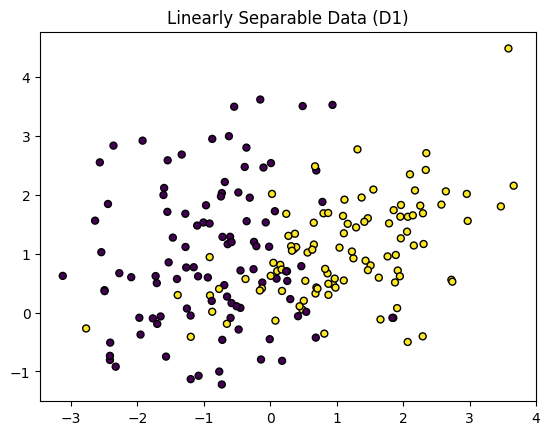

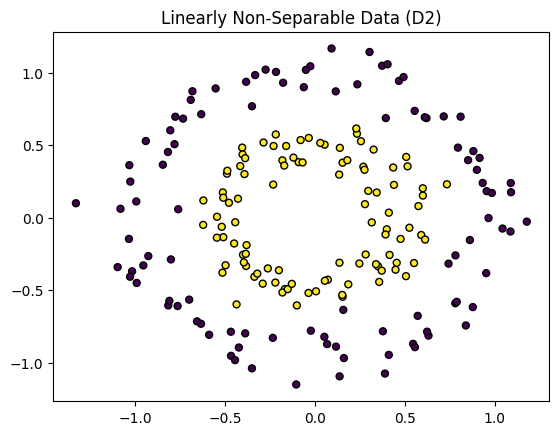

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_circles

# Seed for reproducibility
np.random.seed(42)

# Generate a 2D linearly separable dataset D1
X1, Y1 = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
plt.figure()
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=25, edgecolor='k')
plt.title("Linearly Separable Data (D1)")
plt.show()

# Generate a 2D linearly non-separable dataset D2
X2, Y2 = make_circles(n_samples=200, factor=0.5, noise=0.1)
plt.figure()
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')
plt.title("Linearly Non-Separable Data (D2)")
plt.show()


## Question 2 - Hard Margin Solution Code

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the datasets into train and test sets for D1
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.05, stratify=Y1, random_state=42)

# Divide the datasets into train and test sets for D2
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.05, stratify=Y2, random_state=42)

# Since we have 200 samples total, 20 samples (10% of the data) will be in each test set.
# We stratify by Y1 and Y2 to ensure we have an even split from each class in the test sets.
len(X1_test)

10

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



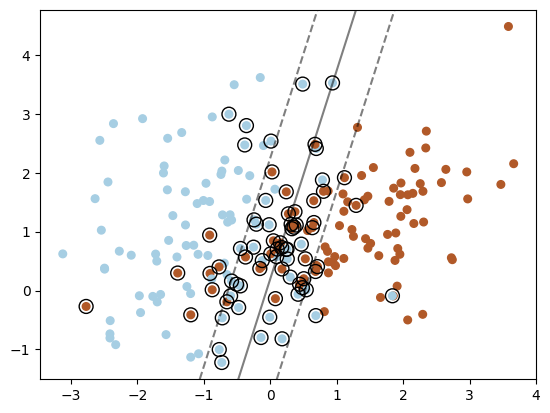

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report

# Create a SVM with a hard margin
clf = svm.SVC(kernel='linear', C=1e6)

# Train the classifier on the D1 training data
clf.fit(X1_train, Y1_train)

# Use the classifier to make predictions on the D1 test data
Y1_pred = clf.predict(X1_test)

# Print out the classification report
print(classification_report(Y1_test, Y1_pred))

# Visualize the decision boundary
plt.scatter(X1[:, 0], X1[:, 1], c=Y1, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.show()


##  Question 3 solution Code - Soft Margin

Test set results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



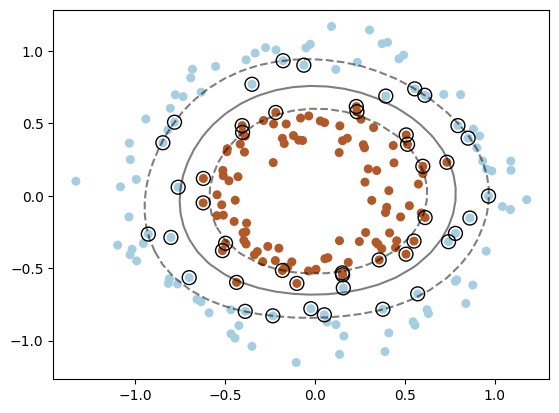

In [ ]:
from sklearn import svm
from sklearn.metrics import classification_report

# Create a SVM with a soft margin
clf = svm.SVC(kernel='rbf', C=1, gamma='scale')

# Train the classifier on the D2 training data
clf.fit(X2_train, Y2_train)

# Use the classifier to make predictions on the D2 test data
Y2_pred = clf.predict(X2_test)

# Print out the classification report
print("Test set results:")
print(classification_report(Y2_test, Y2_pred))

# Visualize the decision boundary
plt.scatter(X2[:, 0], X2[:, 1], c=Y2, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.show()


## Question 4 Solution Code - Multiple Layer Perceptron

In [ ]:
from sklearn.neural_network import MLPClassifier

# Create an MLP with 2 hidden layers of 100 neurons each
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

# Train and test the MLP on D1
mlp.fit(X1_train, Y1_train)
Y1_pred = mlp.predict(X1_test)
print("D1 classification report:")
print(classification_report(Y1_test, Y1_pred))

# Train and test the MLP on D2
mlp.fit(X2_train, Y2_train)
Y2_pred = mlp.predict(X2_test)
print("\nD2 classification report:")
print(classification_report(Y2_test, Y2_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


D1 classification report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10


D2 classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

